In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('/home/ataur/Downloads/Dataset_Assignment Clustering_K Means/AutoInsurance.csv')

In [7]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(['State', 'Effective To Date'], axis=1, inplace=True)

Customer Lifetime Value              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Monthly Premium Auto              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Months Since Last Claim           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Months Since Policy Inception       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number of Open Complaints        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number of Policies               AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Claim Amount               AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

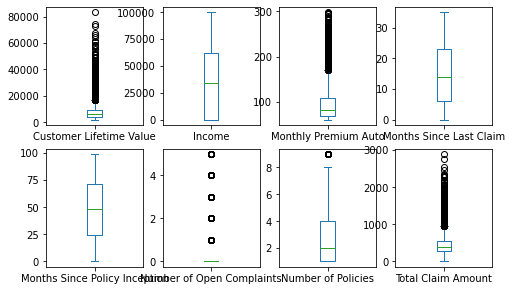

In [12]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(8,10))

## Outlier Treatment

In [13]:
# first column
iqr = df['Customer Lifetime Value'].quantile(0.75) - df['Customer Lifetime Value'].quantile(0.25)
iqr

4967.915247000001

In [14]:
lower_limit = df['Customer Lifetime Value'].quantile(0.25) - 1.5*(iqr)
lower_limit

-3457.6210762500014

In [15]:
upper_limit = df['Customer Lifetime Value'].quantile(0.75) + 1.5*(iqr)
upper_limit

16414.039911750002

In [16]:
df['Customer Lifetime Value'] = np.where(df['Customer Lifetime Value'] > upper_limit, upper_limit, np.where(df['Customer Lifetime Value'] < lower_limit, lower_limit, df['Customer Lifetime Value']))

In [17]:
# second column
iqr = df['Number of Policies'].quantile(0.75) - df['Number of Policies'].quantile(0.25)
iqr

3.0

In [18]:
lower_limit = df['Number of Policies'].quantile(0.25) - 1.5*(iqr)
lower_limit

-3.5

In [19]:
upper_limit = df['Number of Policies'].quantile(0.75) + 1.5*(iqr)
upper_limit

8.5

In [20]:
df['Number of Policies'] = np.where(df['Number of Policies'] > upper_limit, upper_limit, np.where(df['Number of Policies'] < lower_limit, lower_limit, df['Number of Policies']))

In [21]:
# Third column
iqr = df['Monthly Premium Auto'].quantile(0.75) - df['Monthly Premium Auto'].quantile(0.25)
iqr

41.0

In [22]:
lower_limit = df['Monthly Premium Auto'].quantile(0.25) - 1.5*(iqr)
lower_limit

6.5

In [23]:
upper_limit = df['Monthly Premium Auto'].quantile(0.75) + 1.5*(iqr)
upper_limit

170.5

In [24]:
df['Monthly Premium Auto'] = np.where(df['Monthly Premium Auto'] > upper_limit, upper_limit, np.where(df['Monthly Premium Auto'] < lower_limit, lower_limit, df['Monthly Premium Auto']))

In [25]:
# Forth column
iqr = df['Number of Open Complaints'].quantile(0.75) - df['Number of Open Complaints'].quantile(0.25)
iqr

0.0

In [26]:
lower_limit = df['Number of Open Complaints'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.0

In [27]:
upper_limit = df['Number of Open Complaints'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.0

In [28]:
df['Number of Open Complaints'] = np.where(df['Number of Open Complaints'] > upper_limit, upper_limit, np.where(df['Number of Open Complaints'] < lower_limit, lower_limit, df['Number of Open Complaints']))

In [29]:
# Fith column
iqr = df['Total Claim Amount'].quantile(0.75) - df['Total Claim Amount'].quantile(0.25)
iqr

275.2565942500001

In [30]:
lower_limit = df['Total Claim Amount'].quantile(0.25) - 1.5*(iqr)
lower_limit

-140.62664687500018

In [31]:
upper_limit = df['Total Claim Amount'].quantile(0.75) + 1.5*(iqr)
upper_limit

960.3997301250002

In [32]:
df['Total Claim Amount'] = np.where(df['Total Claim Amount'] > upper_limit, upper_limit, np.where(df['Total Claim Amount'] < lower_limit, lower_limit, df['Total Claim Amount']))

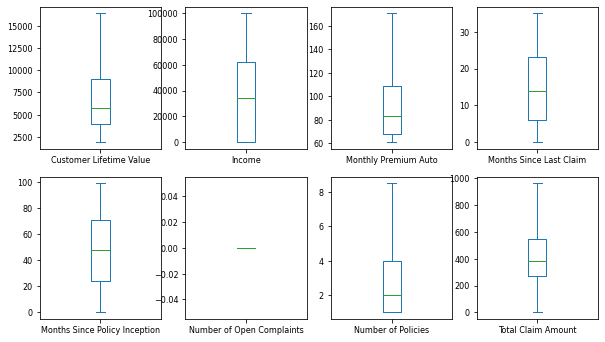

In [33]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(10,12));

In [34]:
df1 = df[['EmploymentStatus', 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies', 'Total Claim Amount']]

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EmploymentStatus               9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Income                         9134 non-null   int64  
 3   Monthly Premium Auto           9134 non-null   float64
 4   Months Since Last Claim        9134 non-null   int64  
 5   Months Since Policy Inception  9134 non-null   int64  
 6   Number of Policies             9134 non-null   float64
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 571.0+ KB


In [36]:
df1.head()

,EmploymentStatus,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,Employed,2763.519279,56274,69.0,32,5,1.0,384.811147
1,Unemployed,6979.535903,0,94.0,13,42,8.0,960.399730
2,Employed,12887.431650,48767,108.0,18,38,2.0,566.472247
3,Unemployed,7645.861827,0,106.0,18,65,7.0,529.881344
4,Employed,2813.692575,43836,73.0,12,44,1.0,138.130879


In [37]:
df1.duplicated().sum()

1090

In [38]:
df2 = df1.drop_duplicates()

In [39]:
df2.isnull().sum()

EmploymentStatus                 0
Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [40]:
df2.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000
mean,7185.889130,37537.235082,91.462208,15.152412,48.037295,2.960592,415.932242
std,4227.538069,30682.191293,28.573660,10.112565,28.018459,2.331943,243.752117
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.423014,0.000000,68.000000,6.000000,24.000000,1.000000,255.995434
50%,5809.097074,34077.500000,83.000000,14.000000,47.000000,2.000000,378.339796
75%,8923.123535,62447.250000,109.000000,23.000000,72.000000,4.000000,549.765871
max,16414.039912,99981.000000,170.500000,35.000000,99.000000,8.500000,960.399730


In [41]:
df2.duplicated().sum()

0

In [42]:
df2.head()

,EmploymentStatus,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,Employed,2763.519279,56274,69.0,32,5,1.0,384.811147
1,Unemployed,6979.535903,0,94.0,13,42,8.0,960.399730
2,Employed,12887.431650,48767,108.0,18,38,2.0,566.472247
3,Unemployed,7645.861827,0,106.0,18,65,7.0,529.881344
4,Employed,2813.692575,43836,73.0,12,44,1.0,138.130879


In [43]:
def Norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [44]:
df_norm = Norm_func(df2.iloc[:,1:])

In [45]:
df_norm.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000
mean,0.364279,0.375444,0.278194,0.432926,0.485225,0.261412,0.433024
std,0.291232,0.306880,0.260947,0.288930,0.283015,0.310926,0.253829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145798,0.000000,0.063927,0.171429,0.242424,0.000000,0.266475
50%,0.269432,0.340840,0.200913,0.400000,0.474747,0.133333,0.393877
75%,0.483956,0.624591,0.438356,0.657143,0.727273,0.400000,0.572390
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.isnull().sum()

Customer                         0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Scree Plot

In [47]:
twss = []

In [48]:
k = list(range(2,9))

In [49]:
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    twss.append(kmeans.inertia_)

In [50]:
twss

[3860.087888416747,
 3317.9536755103054,
 2939.101956050832,
 2708.940806214658,
 2518.834881641249,
 2380.6003169198575,
 2273.3447861501822]

Text(0, 0.5, 'total_within_ss')

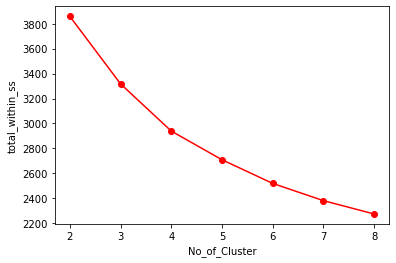

In [51]:
plt.plot(k, twss, 'ro-');plt.xlabel('No_of_Cluster');plt.ylabel('total_within_ss')

In [52]:
model = KMeans(n_clusters=3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [53]:
model.labels_

array([0, 1, 2, ..., 2, 2, 0], dtype=int32)

In [54]:
x = pd.Series(model.labels_)

In [55]:
df['Clust'] = x

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   float64
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [59]:
df.isnull().sum()

Customer                            0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
Clust                            1090
dtype: int64

In [60]:
dfc = df.dropna()

In [61]:
dfc.isnull().sum()

Customer                         0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Clust                            0
dtype: int64

In [63]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8044 entries, 0 to 8043
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8044 non-null   object 
 1   Customer Lifetime Value        8044 non-null   float64
 2   Response                       8044 non-null   object 
 3   Coverage                       8044 non-null   object 
 4   Education                      8044 non-null   object 
 5   EmploymentStatus               8044 non-null   object 
 6   Gender                         8044 non-null   object 
 7   Income                         8044 non-null   int64  
 8   Location Code                  8044 non-null   object 
 9   Marital Status                 8044 non-null   object 
 10  Monthly Premium Auto           8044 non-null   float64
 11  Months Since Last Claim        8044 non-null   int64  
 12  Months Since Policy Inception  8044 non-null   i

In [65]:
fc = dfc.pop('Clust')

In [66]:
dfc.insert(0, 'Clust', fc)

In [67]:
dfc

,Clust,Customer,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0.0,BU79786,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1.0,QZ44356,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,960.399730,Four-Door Car,Medsize
2,2.0,AI49188,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,1.0,WW63253,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0.0,HB64268,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,0.0,QQ69088,5577.669457,No,Basic,Doctor,Disabled,M,11097,Suburban,...,50,0.0,4.0,Corporate Auto,Corporate L3,Offer3,Web,350.400000,Two-Door Car,Small
8040,2.0,ED59130,16414.039912,No,Extended,Bachelor,Employed,M,74900,Suburban,...,63,0.0,6.0,Personal Auto,Personal L1,Offer3,Call Center,960.399730,Luxury SUV,Medsize
8041,2.0,SC90717,16414.039912,No,Extended,Doctor,Employed,M,23576,Urban,...,72,0.0,2.0,Personal Auto,Personal L3,Offer2,Web,383.508096,Four-Door Car,Medsize
8042,2.0,PP36346,3708.811428,No,Extended,High School or Below,Disabled,F,23393,Suburban,...,37,0.0,1.0,Corporate Auto,Corporate L1,Offer2,Branch,456.000000,Four-Door Car,Medsize


In [69]:
dfc.iloc[:,2:].groupby(dfc['Clust']).mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Clust,,,,,,,,
0.0,7220.299418,38122.767634,92.186954,14.984194,47.923567,0.0,2.910474,416.885361
1.0,7126.182819,37691.365839,89.966460,15.237888,49.090683,0.0,3.010559,409.749300
2.0,7108.266362,37383.579499,91.112756,15.112073,48.005467,0.0,2.966515,422.210460


In [70]:
dfc.iloc[:,2:].groupby(dfc['Clust']).median()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Clust,,,,,,,,
0.0,5811.996703,34628.0,84.0,14.0,47.0,0.0,2.0,388.148089
1.0,5662.852094,34980.0,80.0,14.0,49.0,0.0,2.0,374.212038
2.0,5799.826802,33345.0,82.0,14.0,48.0,0.0,2.0,379.200000


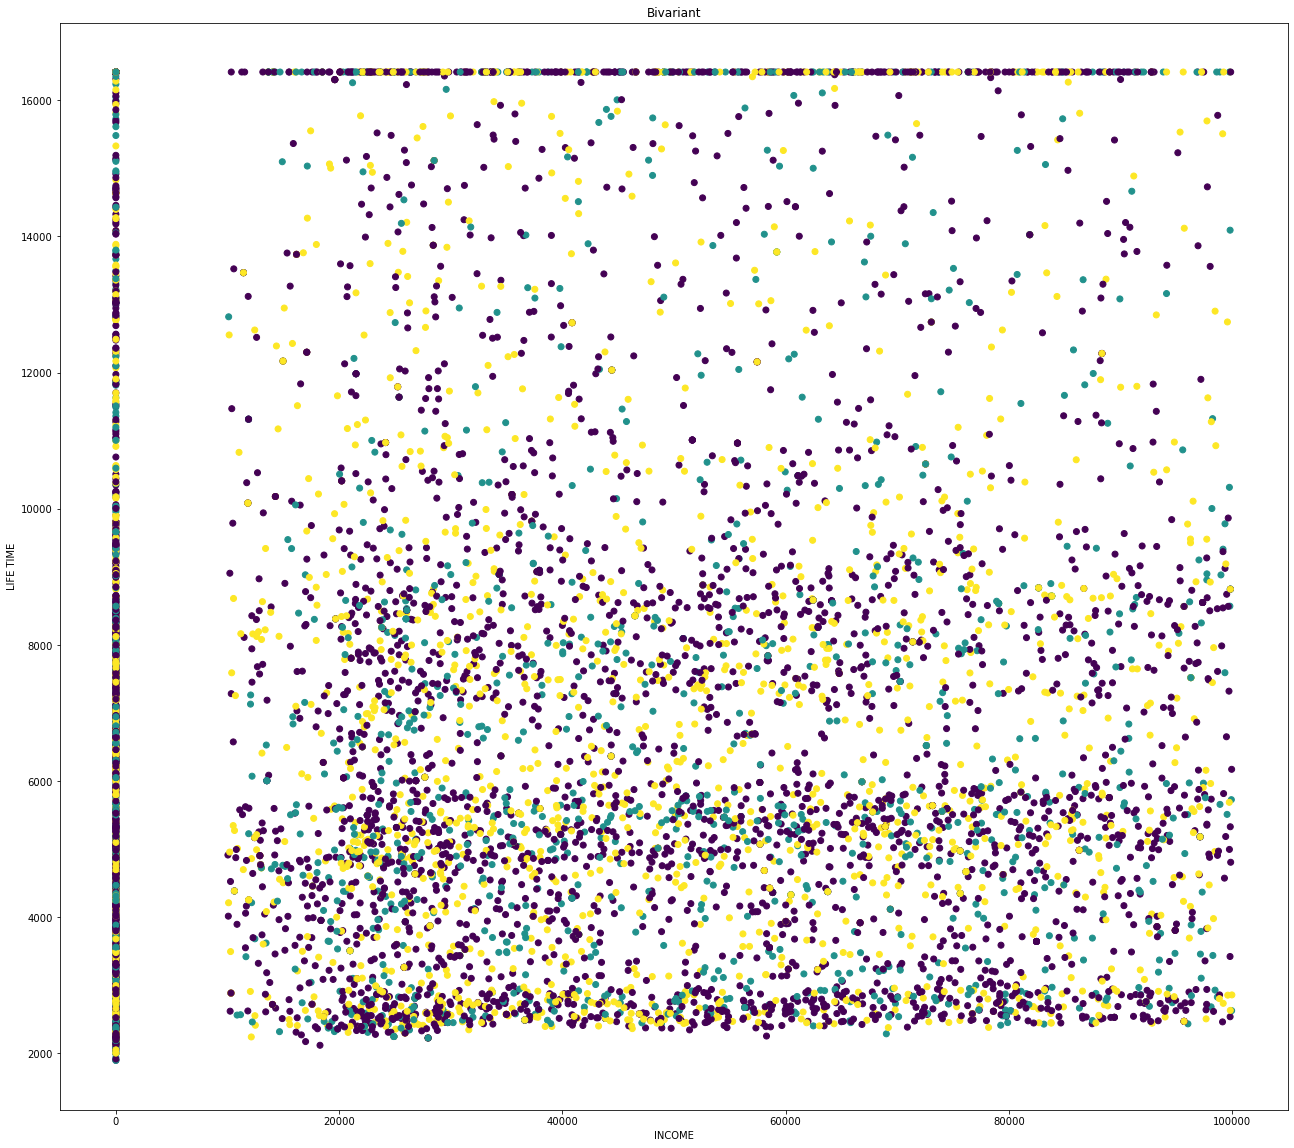

In [78]:
plt.figure(figsize=(22,20));plt.title('Bivariant');plt.xlabel('INCOME');plt.ylabel('LIFE TIME')
plt.scatter(x=dfc['Income'], y=dfc['Customer Lifetime Value'], c=dfc['Clust'])